In [1]:
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
# def run():
#     zip_file_path = "saved_model/very_good_model.zip"
#     # zip_file_path = "saved_model/first_good_ model.zip"
    
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall("restored_model")

#     loaded_model = tf.saved_model.load("restored_model")

#     audio_dir = "data/test"
    
#     for audio_file in os.listdir(audio_dir):
#         audio_file_path = os.path.join(audio_dir, audio_file)
        
#         if audio_file.endswith(".wav"):
#             result = loaded_model(tf.constant(audio_file_path))

#             # Extrahiere Vorhersagedaten
#             predictions = result['predictions'].numpy()[0]
#             class_names = ["original", "upscale-from-mp3-128"] 

#             file_name = os.path.basename(audio_file_path)

#             plt.figure(figsize=(10, 6))
#             plt.barh(class_names, predictions, color='skyblue')  
#             plt.xlabel("Wahrscheinlichkeit")
#             plt.title(f"Modellvorhersagen fuer: {file_name}")
#             plt.gca().invert_yaxis()  # Höchste Wahrscheinlichkeit oben anzeigen
#             plt.show()

In [3]:
def run():
    zip_file_path = "saved_model/very_good_model.zip"
    # zip_file_path = "saved_model/first_good_ model.zip"
    
    # Entpacke das Modell
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("restored_model")

    # Lade das Modell
    loaded_model = tf.saved_model.load("restored_model")

    # Verzeichnis mit Audiodateien
    audio_dir = "data/test"
    
    # Liste zum Speichern der Ergebnisse
    results = []

    # Durchlaufe alle Dateien im Verzeichnis
    for audio_file in os.listdir(audio_dir):
        # Volle Pfadangabe der Audiodatei
        audio_file_path = os.path.join(audio_dir, audio_file)
        
        # Überprüfe, ob es sich um eine .wav-Datei handelt
        if audio_file.endswith(".wav"):
            # Verwende das Modell auf der Audiodatei
            result = loaded_model(tf.constant(audio_file_path))

            # Extrahiere Vorhersagedaten und formatiere sie auf 4 Nachkommastellen als String
            predictions = result['predictions'].numpy()[0]
            class_names = ["original", "upscale-from-mp3-128"]
            class_probabilities = {class_names[i]: f"{predictions[i]:.4f}" for i in range(len(predictions))}

            # Ergebnis zur Liste hinzufügen
            results.append({
                "Dateiname": audio_file,
                **class_probabilities  # Füge die Wahrscheinlichkeiten für jede Klasse hinzu
            })

    # Erstelle einen DataFrame aus den Ergebnissen
    df = pd.DataFrame(results)

    # Ausgabe der Tabelle
    # print(df)
    
    # Optional: Tabelle grafisch anzeigen
    fig, ax = plt.subplots(figsize=(16, len(df) * 0.4))  # Breitere Tabelle für längere Dateinamen
    ax.axis('tight')
    ax.axis('off')

    # Formatieren der Zellen als Strings mit 4 Dezimalstellen
    cell_text = [[f"{value:.4f}" if isinstance(value, float) else value for value in row] for row in df.values]

    # Erstelle die Tabelle in matplotlib
    table = ax.table(cellText=cell_text, colLabels=df.columns, cellLoc="center", loc="center", colWidths=[0.5, 0.25, 0.25])

    # Tabelle verschönern: Farben hinzufügen
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Titelzeile
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#d3d3d3')  # Heller Hintergrund für die Titelzeile
        else:  # Zelleninhalt
            if j == 0:  # Dateiname-Spalte
                cell.set_facecolor('#f0f8ff')  # Blauer Hintergrund für die Dateinamen
            else:
                # Setze die Farben der Wahrscheinlichkeiten
                if float(cell.get_text().get_text()) < 0.5:
                    cell.set_facecolor('#f8d7da')  # Rot, wenn Wahrscheinlichkeit < 0.5
                else:
                    cell.set_facecolor('#d4edda')  # Grün, wenn Wahrscheinlichkeit >= 0.5
            cell.set_fontsize(10)

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Skaliere die Tabelle für bessere Lesbarkeit
    plt.show()

# Test Model

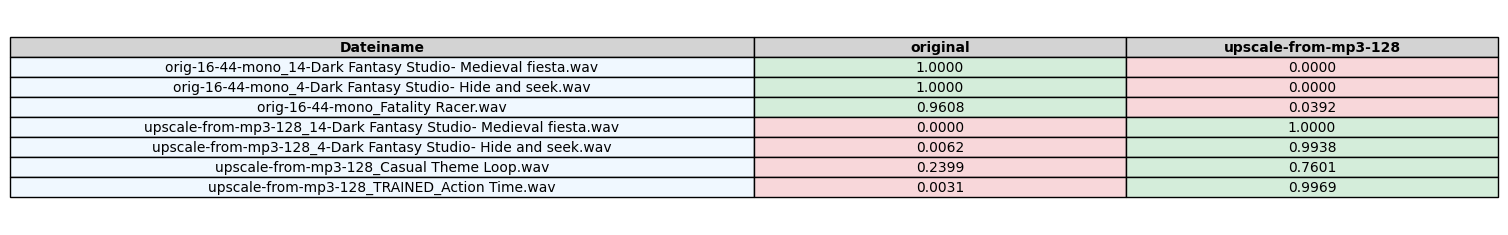

In [4]:
run()